<a href="https://colab.research.google.com/github/whtan88/RandomDataAnalyst_DataAnalysis/blob/main/WoE_and_IV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
#pip install scorecardpy
import scorecardpy as sc
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# check modules and functions within scorecardpy library
dir(sc)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'condition_fun',
 'germancredit',
 'info_value',
 'iv',
 'one_hot',
 'perf',
 'perf_eva',
 'perf_psi',
 'scorecard',
 'scorecard2',
 'scorecard_ply',
 'split_df',
 'var_filter',
 'vif',
 'woebin',
 'woebin_adj',
 'woebin_plot',
 'woebin_ply']

In [ ]:
# view german credit data available within scorecardpy library
dat = sc.germancredit()
print(dat.columns)
dat.head()

Index(['status_of_existing_checking_account', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount',
       'savings_account_and_bonds', 'present_employment_since',
       'installment_rate_in_percentage_of_disposable_income',
       'personal_status_and_sex', 'other_debtors_or_guarantors',
       'present_residence_since', 'property', 'age_in_years',
       'other_installment_plans', 'housing',
       'number_of_existing_credits_at_this_bank', 'job',
       'number_of_people_being_liable_to_provide_maintenance_for', 'telephone',
       'foreign_worker', 'creditability'],
      dtype='object')


,status_of_existing_checking_account,duration_in_month,credit_history,purpose,credit_amount,savings_account_and_bonds,present_employment_since,installment_rate_in_percentage_of_disposable_income,personal_status_and_sex,other_debtors_or_guarantors,...,property,age_in_years,other_installment_plans,housing,number_of_existing_credits_at_this_bank,job,number_of_people_being_liable_to_provide_maintenance_for,telephone,foreign_worker,creditability
0,... < 0 DM,6,critical account/ other credits existing (not ...,radio/television,1169,unknown/ no savings account,... >= 7 years,4,male : divorced/separated,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,good
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,... < 100 DM,1 <= ... < 4 years,2,male : divorced/separated,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,bad
2,no checking account,12,critical account/ other credits existing (not ...,education,2096,... < 100 DM,4 <= ... < 7 years,2,male : divorced/separated,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,good
3,... < 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,... < 100 DM,4 <= ... < 7 years,2,male : divorced/separated,guarantor,...,building society savings agreement/ life insur...,45,none,for free,1,skilled employee / official,2,none,yes,good
4,... < 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : divorced/separated,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,bad


In [ ]:
# variable filter
dt_sel = sc.var_filter(dat, y='creditability')
print(dt_sel.columns)
dt_sel.head()

[INFO] filtering variables ...
Index(['present_employment_since', 'housing', 'duration_in_month',
       'credit_history', 'other_installment_plans',
       'other_debtors_or_guarantors',
       'installment_rate_in_percentage_of_disposable_income', 'property',
       'savings_account_and_bonds', 'purpose', 'credit_amount', 'age_in_years',
       'status_of_existing_checking_account', 'creditability'],
      dtype='object')


,present_employment_since,housing,duration_in_month,credit_history,other_installment_plans,other_debtors_or_guarantors,installment_rate_in_percentage_of_disposable_income,property,savings_account_and_bonds,purpose,credit_amount,age_in_years,status_of_existing_checking_account,creditability
0,... >= 7 years,own,6,critical account/ other credits existing (not ...,none,none,4,real estate,unknown/ no savings account,radio/television,1169,67,... < 0 DM,0
1,1 <= ... < 4 years,own,48,existing credits paid back duly till now,none,none,2,real estate,... < 100 DM,radio/television,5951,22,0 <= ... < 200 DM,1
2,4 <= ... < 7 years,own,12,critical account/ other credits existing (not ...,none,none,2,real estate,... < 100 DM,education,2096,49,no checking account,0
3,4 <= ... < 7 years,for free,42,existing credits paid back duly till now,none,guarantor,2,building society savings agreement/ life insur...,... < 100 DM,furniture/equipment,7882,45,... < 0 DM,0
4,1 <= ... < 4 years,for free,24,delay in paying off in the past,none,none,3,unknown / no property,... < 100 DM,car (new),4870,53,... < 0 DM,1


In [ ]:
# inspect var filter function
help(sc.var_filter)

Help on function var_filter in module scorecardpy.var_filter:

var_filter(dt, y, x=None, iv_limit=0.02, missing_limit=0.95, identical_limit=0.95, var_rm=None, var_kp=None, return_rm_reason=False, positive='bad|1')
    Variable Filter
    ------
    This function filter variables base on specified conditions, such as
    information value, missing rate, identical value rate.

    Params
    ------
    dt: A data frame with both x (predictor/feature) and y
      (response/label) variables.
    y: Name of y variable.
    x: Name of x variables. Default is NULL. If x is NULL, then all
      variables except y are counted as x variables.
    iv_limit: The information value of kept variables should>=iv_limit.
      The default is 0.02.
    missing_limit: The missing rate of kept variables should<=missing_limit.
      The default is 0.95.
    identical_limit: The identical value rate (excluding NAs) of kept
      variables should <= identical_limit. The default is 0.95.
    var_rm: Name of fo

In [ ]:
# variable filter
dt_sel = sc.var_filter(dat, y='creditability', return_rm_reason=True)
dt_sel

[INFO] filtering variables ...


{'dt':     present_employment_since   housing  duration_in_month  \
 0             ... >= 7 years       own                  6   
 1         1 <= ... < 4 years       own                 48   
 2         4 <= ... < 7 years       own                 12   
 3         4 <= ... < 7 years  for free                 42   
 4         1 <= ... < 4 years  for free                 24   
 ..                       ...       ...                ...   
 995       4 <= ... < 7 years       own                 12   
 996       1 <= ... < 4 years       own                 30   
 997           ... >= 7 years       own                 12   
 998       1 <= ... < 4 years  for free                 45   
 999               unemployed       own                 45   
 
                                         credit_history  \
 0    critical account/ other credits existing (not ...   
 1             existing credits paid back duly till now   
 2    critical account/ other credits existing (not ...   
 3          

In [ ]:
# provide reasons for removing columns
dt_sel['rm'].sort_values(by='rm_reason', ascending=False)

,variable,rm_reason,info_value,missing_rate,identical_rate
7,job,info_value<0.02,0.008763,0.0,0.630
8,number_of_existing_credits_at_this_bank,info_value<0.02,0.013267,0.0,0.633
9,number_of_people_being_liable_to_provide_maint...,info_value<0.02,0.000043,0.0,0.845
12,personal_status_and_sex,info_value<0.02,0.008840,0.0,0.548
14,present_residence_since,info_value<0.02,0.003589,0.0,0.413
19,telephone,info_value<0.02,0.006378,0.0,0.596
4,foreign_worker,identical_rate>0.95,0.043877,0.0,0.963
0,age_in_years,NaN,0.260453,0.0,0.051
1,credit_amount,NaN,0.054639,0.0,0.003
2,credit_history,NaN,0.293234,0.0,0.530


In [ ]:
# load breast cancer dataset which we will be using
bc_x, bc_y = load_breast_cancer(return_X_y=True, as_frame=True)
bc_df = pd.concat([bc_x , bc_y], axis=1)
bc_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# variable filter
df_filter = sc.var_filter(bc_df, y='target')

# string column names to prevent error later while using vif function
df_filter.columns = df_filter.columns.str.replace(' ', '_')

df_filter.head()

[INFO] filtering variables ...


,worst_concave_points,perimeter_error,radius_error,symmetry_error,worst_area,mean_texture,compactness_error,concavity_error,worst_compactness,mean_compactness,...,worst_radius,texture_error,mean_radius,mean_perimeter,fractal_dimension_error,worst_concavity,worst_perimeter,mean_concave_points,mean_concavity,target
0,0.2654,8.589,1.0950,0.03003,2019.0,10.38,0.04904,0.05373,0.6656,0.27760,...,25.38,0.9053,17.99,122.80,0.006193,0.7119,184.60,0.14710,0.3001,0
1,0.1860,3.398,0.5435,0.01389,1956.0,17.77,0.01308,0.01860,0.1866,0.07864,...,24.99,0.7339,20.57,132.90,0.003532,0.2416,158.80,0.07017,0.0869,0
2,0.2430,4.585,0.7456,0.02250,1709.0,21.25,0.04006,0.03832,0.4245,0.15990,...,23.57,0.7869,19.69,130.00,0.004571,0.4504,152.50,0.12790,0.1974,0
3,0.2575,3.445,0.4956,0.05963,567.7,20.38,0.07458,0.05661,0.8663,0.28390,...,14.91,1.1560,11.42,77.58,0.009208,0.6869,98.87,0.10520,0.2414,0
4,0.1625,5.438,0.7572,0.01756,1575.0,14.34,0.02461,0.05688,0.2050,0.13280,...,22.54,0.7813,20.29,135.10,0.005115,0.4000,152.20,0.10430,0.1980,0


In [ ]:
# breaking df into train and test
train, test = sc.split_df(df_filter, 'target').values()

In [ ]:
# split into woe bins
bins = sc.woebin(train, y='target')
bins

[INFO] creating woe binning ...
Binning on 398 rows and 31 columns in 00:00:23


{'worst_smoothness':            variable                                        bin  count  \
 0  worst_smoothness                 [-inf,0.10200000000000002)     38   
 1  worst_smoothness  [0.10200000000000002,0.11200000000000003)     39   
 2  worst_smoothness  [0.11200000000000003,0.13600000000000007)    153   
 3  worst_smoothness  [0.13600000000000007,0.15000000000000008)     90   
 4  worst_smoothness                  [0.15000000000000008,inf)     78   
 
    count_distr  good  bad   badprob       woe    bin_iv  total_iv  \
 0     0.095477     2   36  0.947368  2.366123  0.308747  1.057479   
 1     0.097990     5   34  0.871795  1.392674  0.142354  1.057479   
 2     0.384422    40  113  0.738562  0.514260  0.093456  1.057479   
 3     0.226131    44   46  0.511111 -0.479797  0.054360  1.057479   
 4     0.195980    57   21  0.269231 -1.522777  0.458562  1.057479   
 
                 breaks  is_special_values  
 0  0.10200000000000002              False  
 1  0.1120000000000000

In [ ]:
# inspect bin variable
bins['worst_perimeter']

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,worst_perimeter,"[-inf,90.0)",154,0.386935,2,152,0.987013,3.806485,2.262904,6.661562,90.0,False
1,worst_perimeter,"[90.0,100.0)",55,0.138191,2,53,0.963636,2.752896,0.546413,6.661562,100.0,False
2,worst_perimeter,"[100.0,115.0)",62,0.155779,21,41,0.661290,0.144801,0.003201,6.661562,115.0,False
3,worst_perimeter,"[115.0,125.0)",24,0.060302,21,3,0.125000,-2.470159,0.320854,6.661562,125.0,False
4,worst_perimeter,"[125.0,inf)",103,0.258794,102,1,0.009709,-5.149221,3.528191,6.661562,inf,False


In [ ]:
# check woebin details
help(sc.woebin)

Help on function woebin in module scorecardpy.woebin:

woebin(dt, y, x=None, var_skip=None, breaks_list=None, special_values=None, stop_limit=0.1, count_distr_limit=0.05, bin_num_limit=8, positive='bad|1', no_cores=None, print_step=0, method='tree', ignore_const_cols=True, ignore_datetime_cols=True, check_cate_num=True, replace_blank=True, save_breaks_list=None, **kwargs)
    WOE Binning
    ------
    `woebin` generates optimal binning for numerical, factor and categorical
    variables using methods including tree-like segmentation or chi-square
    merge. woebin can also customizing breakpoints if the breaks_list or
    special_values was provided.

    The default woe is defined as ln(Distr_Bad_i/Distr_Good_i). If you
    prefer ln(Distr_Good_i/Distr_Bad_i), please set the argument `positive`
    as negative value, such as '0' or 'good'. If there is a zero frequency
    class when calculating woe, the zero will replaced by 0.99 to make the
    woe calculable.

    Params
    ------

In [ ]:
# check count of targets
cnt_good = len(train[train['target']==0])
cnt_bad = len(train[train['target']==1])
print(f'Count of good : {cnt_good}')
print(f'Count of bad : {cnt_bad}')

Count of good : 148
Count of bad : 250


In [ ]:
# calculate woe for 1 bin
cal_bin_woe = round(np.log((bins['worst_perimeter']['bad'][0]/cnt_bad)/(bins['worst_perimeter']['good'][0]/cnt_good)),6)
print(f'Bin WoE Calculation : {cal_bin_woe}')

Bin WoE Calculation : 3.806485


In [ ]:
# calculate bin iv
cal_bin_iv = round(((bins['worst_perimeter']['bad'][0]/cnt_bad) - (bins['worst_perimeter']['good'][0]/cnt_good))*cal_bin_woe,6)
print(f'Bin IV Calculation : {cal_bin_iv}')

Bin IV Calculation : 2.262904


In [ ]:
# inspect bin iv summation
bins['worst_perimeter']['total_iv'][0] == bins['worst_perimeter']['bin_iv'].sum()

np.True_

In [ ]:
# summary information values
ivs = dict((col, bins[col].loc[0,'total_iv']) for col in bins)
iv_df = pd.DataFrame.from_dict({'feature' : list(ivs.keys()), 'iv' : list(ivs.values())}).sort_values(by='iv', ascending=False)
top_10_feats = iv_df.sort_values(by='iv', ascending=False)['feature'].head(10)
iv_df.head(10)

,feature,iv
14,worst_perimeter,6.661562
9,worst_area,6.368597
13,worst_concave_points,6.220165
22,worst_radius,6.134834
19,mean_concave_points,5.859731
25,mean_perimeter,4.938161
29,mean_radius,4.659811
1,mean_area,4.627060
17,area_error,4.355441
2,mean_concavity,4.055000


{'worst_perimeter': <Figure size 640x480 with 2 Axes>,
 'worst_area': <Figure size 640x480 with 2 Axes>,
 'worst_concave_points': <Figure size 640x480 with 2 Axes>,
 'worst_radius': <Figure size 640x480 with 2 Axes>,
 'mean_concave_points': <Figure size 640x480 with 2 Axes>,
 'mean_perimeter': <Figure size 640x480 with 2 Axes>,
 'mean_radius': <Figure size 640x480 with 2 Axes>,
 'mean_area': <Figure size 640x480 with 2 Axes>,
 'area_error': <Figure size 640x480 with 2 Axes>,
 'mean_concavity': <Figure size 640x480 with 2 Axes>}

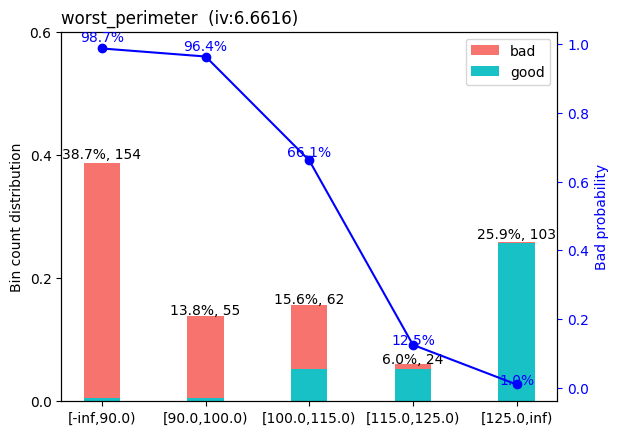

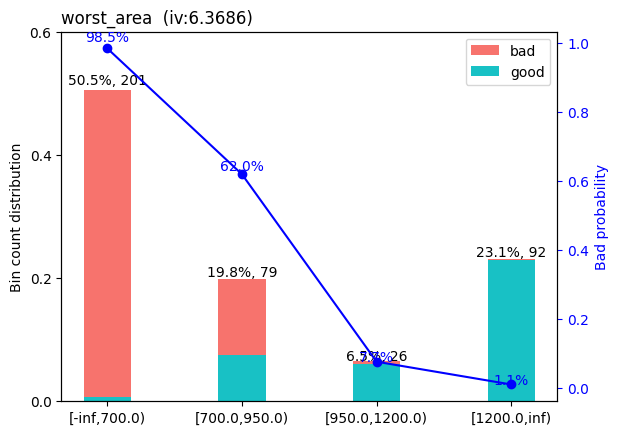

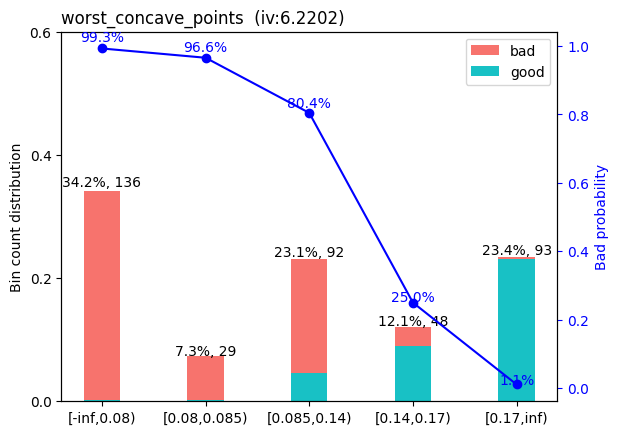

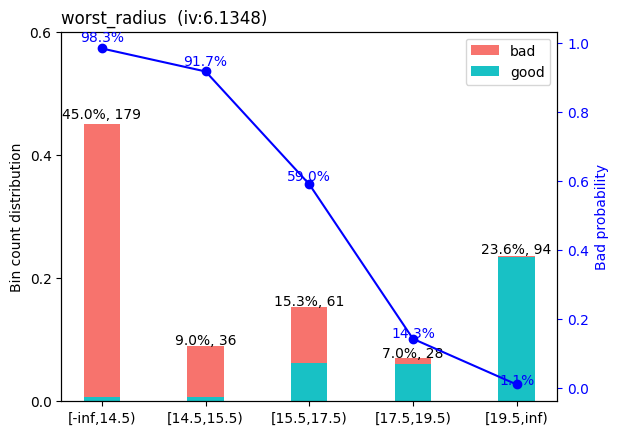

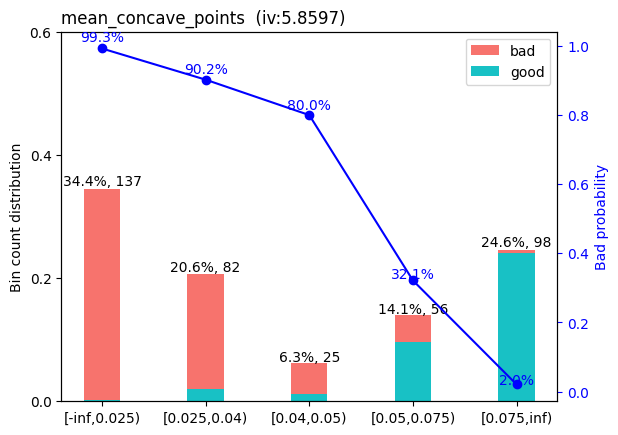

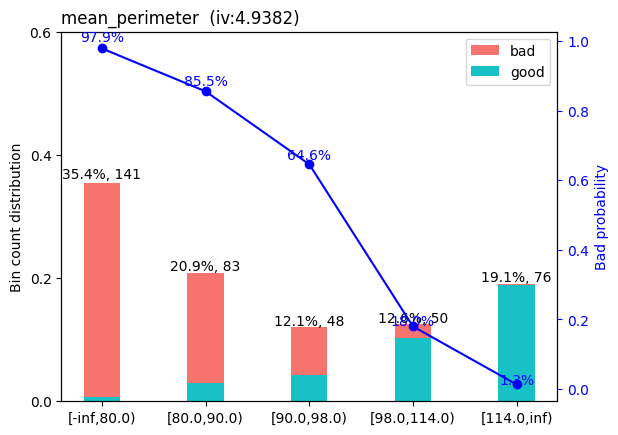

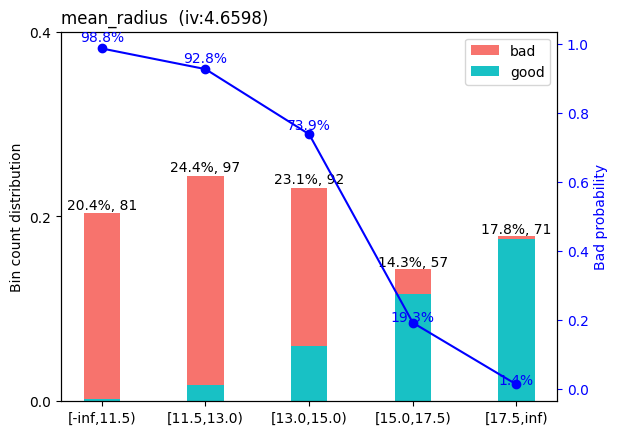

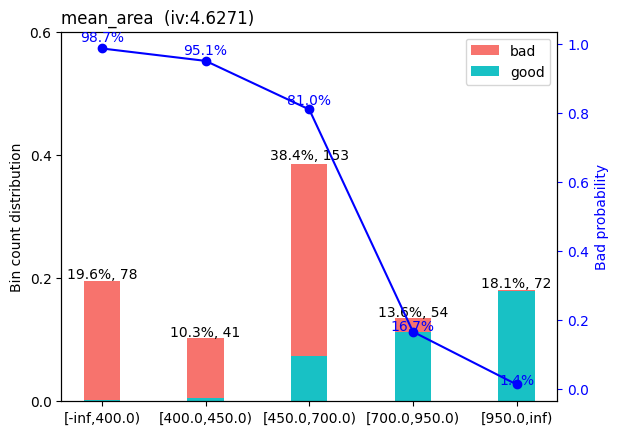

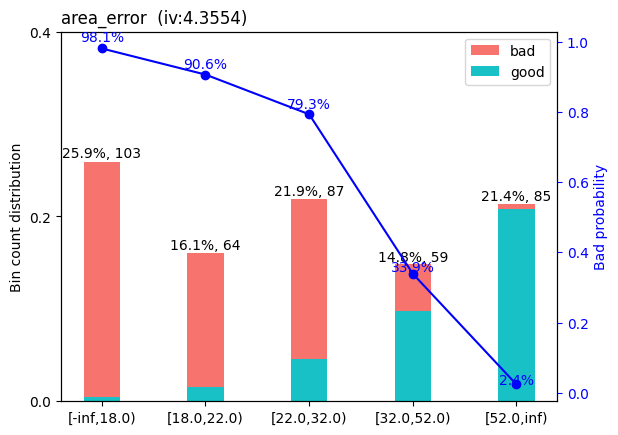

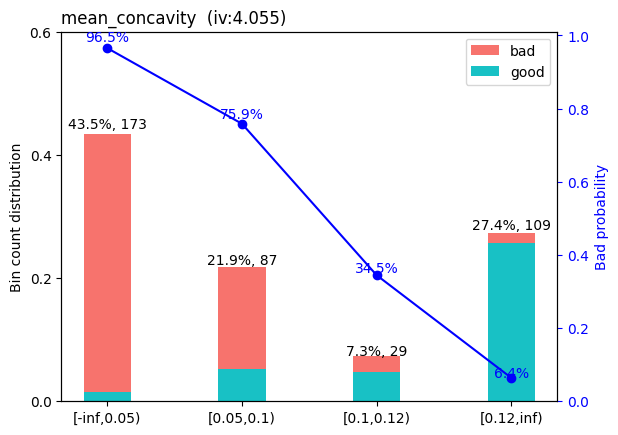

In [ ]:
# Plot woebin for visualization
sc.woebin_plot(bins, top_10_feats)

In [ ]:
# Training a logistic regression model
x_train = train.loc[:, train.columns != 'target']
y_train = train['target'].copy()
x_test = test.loc[:, test.columns != 'target']
y_test = test['target'].copy()

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# Create function to measure model performance
list_title = []
list_predict_train_accuracy = []
list_predict_train_precision = []
list_predict_train_recall = []
list_predict_test_accuracy = []
list_predict_test_precision = []
list_predict_test_recall = []

def model_performance(mdl, y_data_train, x_data_train, y_data_test, x_data_test, title):
    predict_train_accuracy = round(accuracy_score(y_data_train, mdl.predict(x_data_train)),4)
    predict_train_precision = round(precision_score(y_data_train, mdl.predict(x_data_train)),4)
    predict_train_recall = round(recall_score(y_data_train, mdl.predict(x_data_train)),4)

    predict_test_accuracy = round(accuracy_score(y_data_test, mdl.predict(x_data_test)),4)
    predict_test_precision = round(precision_score(y_data_test, mdl.predict(x_data_test)),4)
    predict_test_recall = round(recall_score(y_data_test, mdl.predict(x_data_test)),4)

    list_title.append(title)
    list_predict_train_accuracy.append(predict_train_accuracy)
    list_predict_train_precision.append(predict_train_precision)
    list_predict_train_recall.append(predict_train_recall)
    list_predict_test_accuracy.append(predict_test_accuracy)
    list_predict_test_precision.append(predict_test_precision)
    list_predict_test_recall.append(predict_test_recall)

    print(title)
    print(f'Train Accuracy : {predict_train_accuracy}')
    print(f'Train Precision : {predict_train_precision}')
    print(f'Train Recall : {predict_train_recall}')
    print(f'Test Accuracy : {predict_test_accuracy}')
    print(f'Test Precision : {predict_test_precision}')
    print(f'Test Recall : {predict_test_recall}')

In [ ]:
# Print performance of model trained on normal data
model_performance(lr, y_train, x_train, y_test, x_test, 'Normal Data')

Normal Data
Train Accuracy : 0.9648
Train Precision : 0.9646
Train Recall : 0.98
Test Accuracy : 0.924
Test Precision : 0.9196
Test Recall : 0.9626


In [ ]:
# Converting train and test into woe values
train_woe = sc.woebin_ply(train, bins)
test_woe = sc.woebin_ply(test, bins)
train_woe.head()

[INFO] converting into woe values ...
[INFO] converting into woe values ...


,target,worst_smoothness_woe,mean_area_woe,perimeter_error_woe,smoothness_error_woe,worst_area_woe,symmetry_error_woe,mean_perimeter_woe,mean_texture_woe,worst_compactness_woe,...,worst_perimeter_woe,worst_concavity_woe,worst_symmetry_woe,area_error_woe,mean_concave_points_woe,worst_radius_woe,worst_texture_woe,concave_points_error_woe,worst_concave_points_woe,fractal_dimension_error_woe
0,0,-1.522777,-4.786929,-4.285449,-0.091828,-5.035108,0.497403,-4.841737,1.864514,-3.494663,...,-5.149221,-2.470159,-3.089198,-4.249942,-4.395450,-5.056848,1.652567,-1.163907,-5.046037,-0.524249
1,0,0.514260,-4.786929,-1.462518,-0.091828,-5.035108,0.007056,-4.841737,0.881094,0.289851,...,-5.149221,-0.309839,-0.141879,-4.249942,-1.271463,-5.056848,-0.143974,-1.163907,-5.046037,0.574364
4,0,-0.479797,-4.786929,-4.285449,0.536623,-5.035108,0.007056,-4.841737,1.864514,0.289851,...,-5.149221,-2.470159,0.922670,-4.249942,-4.395450,-5.056848,2.807956,-1.163907,-1.622861,-0.524249
5,0,-1.522777,0.928737,0.778276,0.431263,-0.033626,-0.236567,1.253525,1.864514,-3.494663,...,0.144801,-2.470159,-3.089198,0.819486,-4.395450,1.873647,-0.143974,-0.272934,-5.046037,-0.524249
6,0,-0.479797,-4.786929,-1.462518,-0.410920,-5.035108,0.007056,-4.841737,-0.088931,0.289851,...,-5.149221,-2.470159,-0.141879,-4.249942,-1.271463,-5.056848,-0.143974,0.492686,-5.046037,0.777963


In [ ]:
# Training a logistic regression model using woe values
x_train_woe = train_woe.loc[:, train_woe.columns != 'target']
y_train_woe = train_woe['target'].copy()
x_test_woe = test_woe.loc[:, test_woe.columns != 'target']
y_test_woe = test_woe['target'].copy()

lr_woe = LogisticRegression()
lr_woe.fit(x_train_woe, y_train_woe)

# Print performance of model trained using woe values
model_performance(lr_woe, y_train_woe, x_train_woe, y_test_woe, x_test_woe, 'WoE values Data')

WoE values Data
Train Accuracy : 0.9975
Train Precision : 0.996
Train Recall : 1.0
Test Accuracy : 0.9591
Test Precision : 0.9464
Test Recall : 0.9907


In [ ]:
# Assess variance inflation factor (vif)
sc.vif(df_filter, y='target', x=list(df_filter.columns)[:-1], merge_coef=True).sort_values(by='vif', ascending=False).head(10)

,variables,Coef.,Std.Err.,z,P>|z|,[0.025,0.975],vif
12,mean_radius,4.029447e+15,4.929522e+07,8.174114e+07,0.0,4.029447e+15,4.029447e+15,3806.115296
11,mean_perimeter,-4.890095e+14,7.130680e+06,-6.857825e+07,0.0,-4.890095e+14,-4.890095e+14,3786.400419
4,const,2.056314e+16,1.216002e+08,1.691046e+08,0.0,2.056314e+16,2.056314e+16,1868.188844
27,worst_radius,-9.245482e+14,1.646908e+07,-5.613842e+07,0.0,-9.245483e+14,-9.245482e+14,799.105946
26,worst_perimeter,-1.011480e+14,1.686451e+06,-5.997683e+07,0.0,-1.011480e+14,-1.011480e+14,405.023336
6,mean_area,-7.808806e+12,1.492392e+05,-5.232409e+07,0.0,-7.808806e+12,-7.808806e+12,347.878657
21,worst_area,1.125752e+13,9.081947e+04,1.239550e+08,0.0,1.125752e+13,1.125752e+13,337.221924
17,radius_error,-1.067671e+16,8.820641e+07,-1.210423e+08,0.0,-1.067671e+16,-1.067671e+16,75.462027
9,mean_concavity,7.825988e+15,2.971372e+08,2.633796e+07,0.0,7.825987e+15,7.825988e+15,70.767720
16,perimeter_error,1.171795e+15,1.168202e+07,1.003076e+08,0.0,1.171795e+15,1.171795e+15,70.359695


In [ ]:
# Create dataframe using the top 5 features based on vif
df_filter_vif = df_filter[['mean_radius','mean_perimeter','worst_radius','worst_perimeter','mean_area', 'target']].copy()
df_filter_vif.head()

,mean_radius,mean_perimeter,worst_radius,worst_perimeter,mean_area,target
0,17.99,122.80,25.38,184.60,1001.0,0
1,20.57,132.90,24.99,158.80,1326.0,0
2,19.69,130.00,23.57,152.50,1203.0,0
3,11.42,77.58,14.91,98.87,386.1,0
4,20.29,135.10,22.54,152.20,1297.0,0


In [ ]:
# breaking df into train and test
train_vif, test_vif = sc.split_df(df_filter_vif, 'target').values()

# split into woe bins
bins_vif = sc.woebin(train_vif, y='target')

[INFO] creating woe binning ...


In [ ]:
# information values
ivs_vif = dict((col, bins_vif[col].loc[0,'total_iv']) for col in bins_vif)
iv_df_vif = pd.DataFrame.from_dict({'feature' : list(ivs_vif.keys()), 'iv' : list(ivs_vif.values())}).sort_values(by='iv', ascending=False)
iv_df_vif

,feature,iv
4,worst_perimeter,6.661562
2,worst_radius,6.134834
3,mean_perimeter,4.938161
1,mean_radius,4.659811
0,mean_area,4.627060


{'mean_area': <Figure size 640x480 with 2 Axes>,
 'mean_radius': <Figure size 640x480 with 2 Axes>,
 'worst_radius': <Figure size 640x480 with 2 Axes>,
 'mean_perimeter': <Figure size 640x480 with 2 Axes>,
 'worst_perimeter': <Figure size 640x480 with 2 Axes>}

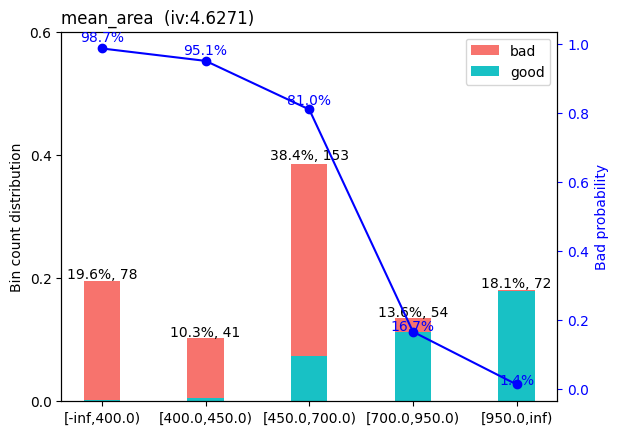

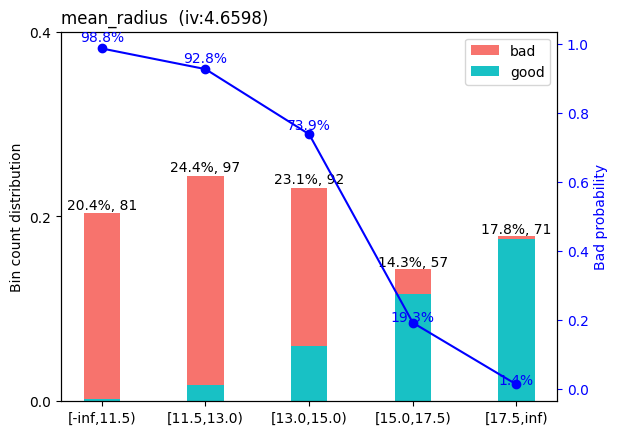

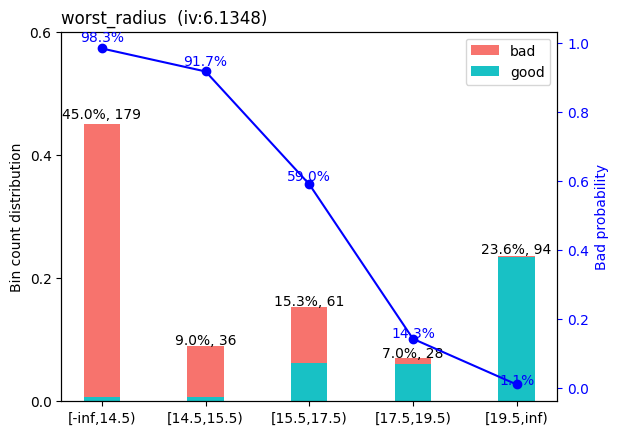

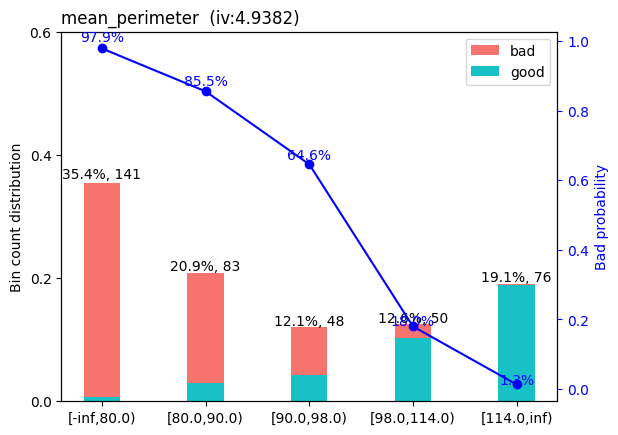

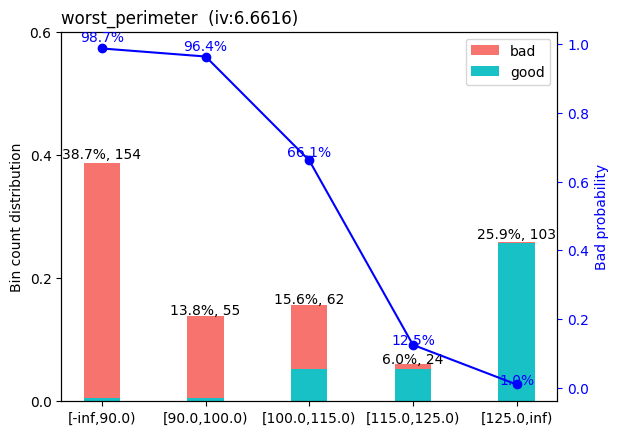

In [ ]:
# Plot woebin for visualization
sc.woebin_plot(bins_vif)

In [ ]:
# Training a logistic regression model using vif values
x_train_vif = train_vif.loc[:, train_vif.columns != 'target']
y_train_vif = train_vif['target'].copy()
x_test_vif = test_vif.loc[:, test_vif.columns != 'target']
y_test_vif = test_vif['target'].copy()

lr_vif = LogisticRegression()
lr_vif.fit(x_train_vif, y_train_vif)

# Print performance of model trained using vif values
model_performance(lr_vif, y_train_vif, x_train_vif, y_test_vif, x_test_vif, 'selected 5 features (vif) data')

selected 5 features (vif) data
Train Accuracy : 0.9472
Train Precision : 0.9526
Train Recall : 0.964
Test Accuracy : 0.9298
Test Precision : 0.9204
Test Recall : 0.972


In [ ]:
# Create dataframe to compare model performance
mdl_perf = pd.DataFrame({'model' : list_title,
                         'train_accuracy' : list_predict_train_accuracy,
                         'train_precision' : list_predict_train_precision,
                         'train_recall' : list_predict_train_recall,
                         'test_accuracy' : list_predict_test_accuracy,
                         'test_precision' : list_predict_test_precision,
                         'test_recall' : list_predict_test_recall})
mdl_perf

,model,train_accuracy,train_precision,train_recall,test_accuracy,test_precision,test_recall
0,Normal Data,0.9648,0.9646,0.980,0.9240,0.9196,0.9626
1,WoE values Data,0.9975,0.9960,1.000,0.9591,0.9464,0.9907
2,selected 5 features (vif) data,0.9472,0.9526,0.964,0.9298,0.9204,0.9720
